# Lab 2: Classification (Part 1)

## Name: Punit K. Jha (punit2)

### Due September 11, 2019 11:59 PM

#### Logistics and Lab Submission

See the [course website](https://courses.engr.illinois.edu/ece365/fa2019/logisticsvvv.html).

#### What You Will Need To Know For This Lab

This lab covers some basic classifiers which can be used for M-ary classification.

- k-Nearest Neighbors
- Bayes Classifiers
- Linear Discriminant Analysis

There are some problems which have short answer questions. <b>Do not write an essay -- a few (1-2) complete sentences will suffice.</b>

<b>Also, be clear about your answers</b>. For example, if a question asks you "Which classifier would you choose?", be unequivocal about which classifier you would choose (and why); as engineers, part of your job is to make design decisions and justify them in comparison to the alternatives. 

#### Preamble (Don't change this)

In [1]:
%pylab inline
import numpy as np
import scipy as sp
import scipy.spatial.distance as dist
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load the data needed for Problems 1-3 

# Read the data
traindata_tmp= genfromtxt('train.csv', delimiter=',')
valdata_tmp= genfromtxt('val.csv', delimiter=',')

#The data which you will use to train LDA and kNN is called "trainingdata"
trainingdata=traindata_tmp[:,:2]
#The corresponding labels are in "traininglabels"
traininglabels=traindata_tmp[:,2]

#The data which you will use to validate LDA, kNN and the Bayes Classifier
#is called "valdata"
valdata=valdata_tmp[:,:2]
#The corresponding labels are in "vallabels"
vallabels=valdata_tmp[:,2]

In [3]:
# Some code to visualize decision regions in Problem 1 to 3; you don't need to look at this
adp=np.vstack([trainingdata,valdata])
xmin,xmax = adp[:,0].min()-1, adp[:,0].max()+1
ymin,ymax = adp[:,0].min()-1, adp[:,0].max()+1
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.05),np.arange(ymin, ymax, 0.05))
drdata= np.c_[xx.ravel(), yy.ravel()]

#### Problem 1 : Bayes Classifiers (20 points + 5 bonus points)

In this section, you will implement a Bayes classifier for the following $M$-ary classification problem:

$$H_y: \mathbf{X} \sim \mathcal{N}(\mathbf{\mu}_y,{\sf C}) \qquad y=0,\ldots,M-1$$

i.e. the data is a $d$-dimensional Gaussian with a common covariance matrix $\sf C$ among all classes, but the means are different (and there is a prior among the classes). Remember, when the mean vectors, covariance matrix and prior probabilities are known, no classifier can do better than the Bayes classifier.

You will write a function which takes in 4 parameters:
* A set of data to classify (with rows as feature vectors) as a $(V,d)$ numpy.ndarray (data)
* A M-length vector with the prior probabilities of each class as a numpy.ndarray (pi)
* A matrix with rows giving the class means as a $(M,d)$ numpy.ndarray (means)
* The common covariance matrix as a $(d,d)$ numpy.ndarray (cov)

It will output a length $V$ numpy.ndarray of the outputs of the classifier (labels). You may not use scikit-learn or similar to implement this. Note that the class labels in this problem are $0,1,2$ (not $1,2,3$). Since Python uses zero-based indexing, this will allow you to avoid a few +1's in your code. 

<b>Note that there are 5 bonus points for not using loops in Problem 1.</b>

Some hints
* If you did lab 1, exercises 5 and 6, they will get you through the bulk of this problem.
* A non-exhaustive list of useful functions: numpy.linalg.inv, numpy.sum, numpy.log, numpy.argmax.
* You may use <a href="http://docs.scipy.org/doc/numpy-1.10.1/user/basics.broadcasting.html">broadcasting</a> to help simplify your code. The basic form you may want to use is, if you have code which says A + B where A is (n,m) and B is (m,) then numpy will automatically translate this to adding B to each row of A. 


A function prototype is provided below <b>(10 points)</b>:

In [4]:
def NoLoopbayesClassifier(data,pi,means,cov): #Without the loop
    C_inverse=numpy.linalg.pinv(cov)
    new=np.zeros((data.shape[0],pi.shape[0]))
    tmp=np.log(pi)+np.dot(data,np.dot(mu,C_inverse).T)-(new+0.5*(np.sum(np.multiply(np.dot(mu,C_inverse),mu),axis=1)))
    v=np.argmax(tmp,axis=1)
    return v
   

Now, you will write a function which calculates the error of a classifier using the $0,1$-loss by comparing the true labels and the predicted labels. 

The function will take in two parameters:
* A vector of length $N$ with the true labels as a numpy.ndarray (truelabels)
* A vector of length $N$ with the estimated labels as a numpy.ndarray (estimatedlabels)

The function will return the error (a scalar).

A function prototype is provided below <b>(5 points)</b>:

In [5]:
def classifierError(truelabels,estimatedlabels):
     error=((np.count_nonzero(truelabels!=estimatedlabels))/len(truelabels))*100
     return error

Now, we will load some sample data, in the format specified above. 
We have three classes, with
$$\pi_0=\frac{1}{4}, \pi_1=\frac{1}{4}, \pi_2=\frac{1}{2}$$

$$\mathbf{\mu}_0=\begin{bmatrix} 1 \\ 5\end{bmatrix},\mathbf{\mu}_1=\begin{bmatrix} 5 \\ 0\end{bmatrix}, \mathbf{\mu}_2=\begin{bmatrix} -2\\-2\end{bmatrix} $$

$$\Sigma=\begin{bmatrix} 5 & 1 \\ 1 & 5 \end{bmatrix}$$


In [6]:
#The data which you will use to test the classifier is called "data"
data=np.copy(valdata)
#The labels are in "truelabels"
truelabels=np.copy(vallabels)
pi=np.array([0.25,0.25,0.5])
mu=np.array([[1,5],[5,0],[-2,-2]])
cov=np.array([[5,1],[1,5]])

Let's visualize the data by class. Each class will be in a different color.

(-7.345781630824372, 11.62528163082437, -8.5409666004415, 12.0151666004415)

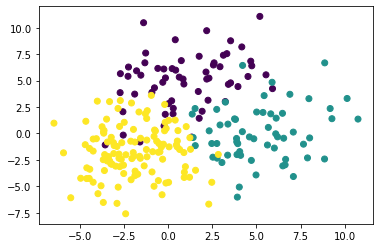

In [7]:
scatter(data[:,0], data[:,1], c=truelabels)
axis('tight')

Run the classifier on the data in `data` with labels `truelabels`. Store the predicted labels in a variable called `estimatedlabels` and report the classifier's error rate. Run the classifier on the data in `drdata` and store the labels outputted by the classifier into a variable called `drB`. We will use `drB` to help visualize the decision regions. <b>(5 points)</b>

In [8]:
estimatedlabels=NoLoopbayesClassifier(data,pi,mu,cov)
error=classifierError(truelabels,estimatedlabels)
print(error)
drB=NoLoopbayesClassifier(drdata,pi,mu,cov)
%timeit NoLoopbayesClassifier(data,pi,mu,cov)

9.583333333333334
179 µs ± 3.15 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


9.5833%

Now, lets visualize the output of our classifier. 

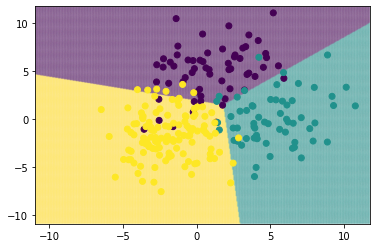

In [9]:
pcolormesh(xx,yy,drB.reshape(xx.shape),alpha=0.1,antialiased=True)
axis('tight')
scatter(data[:,0],data[:,1],c=truelabels)

You should observe linear boundaries between the decision regions and almost all the points are in the correct region for this problem. 

#### Problem 2 : Linear Discriminant Analysis (25 points)

In this problem, you will implement Linear Discriminant Analysis (LDA). You will use the Bayes classifier from Problem 1 to do this. You will be given:
* Training data feature vectors as a $(N,d)$ numpy.ndarray (trainfeat), where each row is a feature vector.
* Training data labels as a length $N$ numpy.ndarray (trainlabel)

The first function you will write will return a tuple of the estimates of the prior probabilities (as a $M$ length numpy.ndarray), means (as a $(M,d)$ numpy.ndarray) and covariance matrix (as a $(d,d)$ numpy.ndarray) in the LDA model. You may assume that labels $0,\ldots,$trainlabel.max() exist in order to avoid some error checking. 

A hint:
* You can use logical operations+slicing to index an array. For example, if you want to get all training feature vectors whose  labels are `i`, you can use `trainfeat[trainlabel==i]`

A function prototype is provided below: <b>(10 points)</b>

In [10]:
def trainLDA(trainfeat,trainlabel):
    nlabels=int(trainlabel.max())+1 #Assuming all labels up to nlabels exist.
    pi=np.zeros(nlabels) # store your prior in here
    means=np.zeros((nlabels,trainfeat.shape[1])) # store the class means in here
    cov=np.zeros((trainfeat.shape[1],trainfeat.shape[1])) # store the covariance matrix in here

    for x in range(0,nlabels):
        pi[x]=np.count_nonzero(trainlabel==x)/trainfeat.shape[0]
        means[x]=sum(trainfeat[trainlabel==x],axis=0)/np.count_nonzero(trainlabel==x)
        cov+=((trainfeat[traininglabels==x]-means[x]).T).dot((trainfeat[traininglabels==x]-means[x]))
    cov=cov/(trainfeat.shape[0]-nlabels)
    return (pi,means,cov)

Our training data is in a numpy array called `trainingdata`, with corresponding labels `traininglabels`. Our validation data is in a numpy array called `valdata`, with corresponding labels `vallabels`. The data format is the same as Problem 1. 

And we can visualize the training data:

(-10.925541630824373, 10.317241630824372, -9.638406600441503, 11.7238066004415)

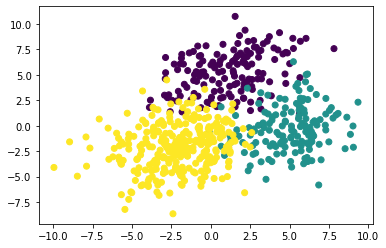

In [11]:
# We will use the following code to visualize the decision regions of the classifier.
# You don't need to look at this cell.

scatter(trainingdata[:,0],trainingdata[:,1],c=traininglabels)
axis('tight')

Use the bayesClassifier function you wrote in Problem 1 along with the trainLDA function from Problem 2 to implement the LDA classifier. Train the LDA classifier on the training data in `trainingdata`, and then run the LDA classifier on the training data and the validation data. Store the predicted training labels in `estimatedtraininglabels` and the predicted labels on the validation data in `estimatedvallabels`. Calculate the corresponding errors. Make sure to display the prior, means and covariance estimated in LDA. Also, run your LDA classifier on the data in `drdata` and store the resultant predicted labels in `drLDA` to help visualize the output of the classifier. <b>(5 points)</b>

In [12]:
pi,means,cov=trainLDA(trainingdata,traininglabels)
print(pi,"\n\n",means,"\n\n",cov)
estimatedtraininglabels=NoLoopbayesClassifier(trainingdata,pi,means,cov)
error_train=classifierError(traininglabels,estimatedtraininglabels)
print("Traning Error",error_train)

estimatedvallabels=NoLoopbayesClassifier(valdata,pi,means,cov)
error_valid=classifierError(vallabels,estimatedvallabels)
print("Validation Error",error_valid)
drLDA=NoLoopbayesClassifier(drdata,pi,means,cov)

%timeit trainLDA(trainingdata,traininglabels)
%timeit NoLoopbayesClassifier(trainingdata,pi,means,cov)

[0.25 0.25 0.5 ] 

 [[ 1.12191279  5.17315581]
 [ 4.91358665 -0.28614234]
 [-2.07276858 -2.11161245]] 

 [[4.67512737 1.04472481]
 [1.04472481 4.79078813]]
Traning Error 6.5
Validation Error 9.583333333333334
433 µs ± 61.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
205 µs ± 5.89 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


The training data is generated with the distribution used in Problem 1, so your $\pi, \mu, {\sf C}$ should all be pretty close to the ones given in Problem 1. If they are not close, you've done something wrong. 

Report the training error (error of the classifier on the training data) and the validation error (error of the classifier on the validation data). <b>(5 points)</b>

In [13]:
# Put your code here
error_train=classifierError(traininglabels,estimatedtraininglabels)
error_valid=classifierError(vallabels,estimatedvallabels)
print("Traning Error",error_train)
print("Validation Error",error_valid)

Traning Error 6.5
Validation Error 9.583333333333334


Traning Error 6.5%
Validation Error 9.583%

We can also visualize the performance of the classifier on the training and validation data. In this problem, both the training and validation data was generated from the distributions specified in Problem 1, so we show both the LDA classifier (which you learned from the data) and the Bayes classifier (which assumed you knew the true joint distribution of the data and the labels). 

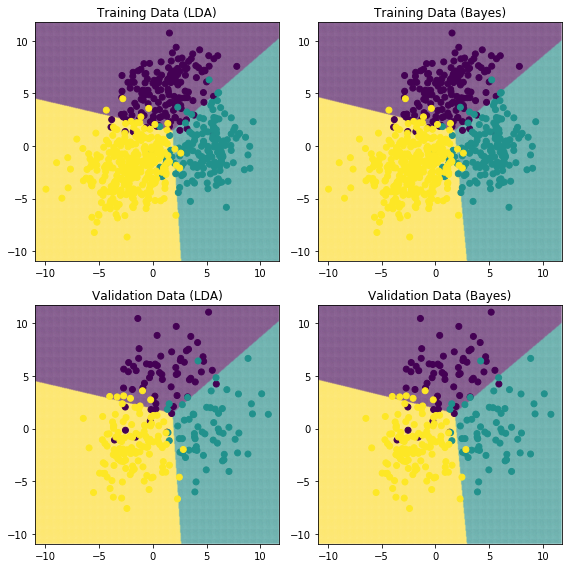

In [14]:
figure(figsize=(8, 8)) # If this is looking a bit squished, you can change the 8 (width) and 8 (height)
subplot(2,2,1)
pcolormesh(xx,yy,drLDA.reshape(xx.shape),alpha=0.1,antialiased=True)
axis('tight')
scatter(trainingdata[:,0],trainingdata[:,1],c=traininglabels)
title('Training Data (LDA)')
subplot(2,2,2)
pcolormesh(xx,yy,drB.reshape(xx.shape),alpha=0.1,antialiased=True)
axis('tight')
scatter(trainingdata[:,0],trainingdata[:,1],c=traininglabels)
title('Training Data (Bayes)')
subplot(2,2,3)
pcolormesh(xx,yy,drLDA.reshape(xx.shape),alpha=0.1,antialiased=True)
axis('tight')
scatter(valdata[:,0],valdata[:,1],c=vallabels)
title('Validation Data (LDA)')
subplot(2,2,4)
pcolormesh(xx,yy,drB.reshape(xx.shape),alpha=0.1,antialiased=True)
axis('tight')
scatter(valdata[:,0],valdata[:,1],c=vallabels)
title('Validation Data (Bayes)')
tight_layout()

Most of the points should be correctly classified in both the training and validation data. If they are not, you've done something wrong. 

In this problem, we see that the LDA classifier gives boundaries which are quite similar to the Bayes classifier (assuming you've implemented both correctly). If you had a lot of training data from an <b>arbitrary distribution</b>, would you expect the LDA classifier to give similar boundaries to the Bayes classifier? Why or Why not? <b>(5 points)</b>

<b>The LDA classifier and the Bayes classifier both operate on the same training set that is assumed to be multivariate Gaussian distributions with different means but similar covariances of the feature vector that's why the boundaries are kind of similar. However, if we choose any arbitrary distribution then the results/predictions obtained from the LDA classifier may suffer as the arbitrary distribution of the samples/features may not be Gaussian. In that case the LDA boundaries will be different from the Bayes classifier. Also LDA does not work well if the classes are not balanced, i.e., when the number of sample points in various classes is very different.

#### Problem 3: k-Nearest Neighbors + Some Short Answer Questions (35 points)

Implement the k-Nearest Neighbors algorithm.

Your function will take:
* Training data feature vectors as a $(N,d)$ numpy.ndarray (trainfeat), where each row is a feature vector
* Training data labels as a length $N$ numpy.ndarray (trainlabel)
* Test data feature vectors as a $(V,d)$ numpy.ndarray (testfeat), where each row is a feature vector
* The value of k

Use the Euclidean distance (scipy.spatial.distance.cdist) as your dissimilarity measure. 

Your function should return a length $V$ numpy.ndarray vector of the estimated labels. This should take around 4 lines of code. Do not use the kNN implementation in scikit-learn or similar.

Some functions which may be useful (read the documentation):
* The numpy.argpartition function can be used to find the $k$ smallest elements of an array (via slicing)
* scipy.stats.mode can find the most common element in an array. 

<b>(10 points)</b>

In [15]:
def kNN(trainfeat,trainlabel,testfeat, k):
    Y = sp.spatial.distance.cdist(trainfeat, testfeat, 'euclidean')#the distance for testfeat stored in each cols
    lol=np.argpartition(Y, k, axis=0)[:k,:]
    labels=trainlabel[lol]
    return stats.mode(labels,axis=0)[0]
    
    

Run your k-Nearest Neighbors classifier with the training data in `trainingdata` and validation data in `valdata` from Problem 2, for $k=1,3,4,5$. Compute the training and validation error rates on the data from Problem 2. <b>(5 points)</b>

In [16]:
k=[1,3,4,5]

for x in k:
    estimatedtrainKK=kNN(trainingdata,traininglabels,trainingdata, x)
    errorKK_train=classifierError(traininglabels,estimatedtrainKK)
    estimatedvallabelsKK=kNN(trainingdata,traininglabels,valdata, x)
    errorKK_valid=classifierError(vallabels,estimatedvallabelsKK)
    print("-------------------------------------------------------------")
    print('The training error with k=%d is %3.4f percent ' %(x,errorKK_train))
    print('The validation error with k=%d is %3.4f percent' % (x,errorKK_valid))
    print("-------------------------------------------------------------")

print("-------------------------------------------------------------")
print("-------------------------------------------------------------")
%timeit estimatedtrainKK=kNN(trainingdata,traininglabels,trainingdata, 1)
%timeit estimatedtrainKK=kNN(trainingdata,traininglabels,trainingdata, 3)
%timeit estimatedtrainKK=kNN(trainingdata,traininglabels,trainingdata,5)
print("-------------------------------------------------------------")
print("-------------------------------------------------------------")


-------------------------------------------------------------
The training error with k=1 is 0.0000 percent 
The validation error with k=1 is 11.2500 percent
-------------------------------------------------------------
-------------------------------------------------------------
The training error with k=3 is 5.6667 percent 
The validation error with k=3 is 10.8333 percent
-------------------------------------------------------------
-------------------------------------------------------------
The training error with k=4 is 6.3333 percent 
The validation error with k=4 is 10.8333 percent
-------------------------------------------------------------
-------------------------------------------------------------
The training error with k=5 is 6.0000 percent 
The validation error with k=5 is 10.0000 percent
-------------------------------------------------------------
-------------------------------------------------------------
----------------------------------------------------------

Which value of k would you choose for the k-NN classifier? Why? Run your k-NN classifier with the chosen value of k on  the data in `drdata` and store the result in a variable called `drK`.<b>(5 points)</b>

 <b>I will choose k=5 since it givens the minimum error on the validation set.

In [17]:
k=5 # Put the value of k you would choose in the variable k.
drK=kNN(trainingdata,traininglabels,drdata, 5)

<b>I will choose k=5 since it givens the minimum error on the validation set.

Now, let us visualize the decision boundaries of your chosen value of $k$. 

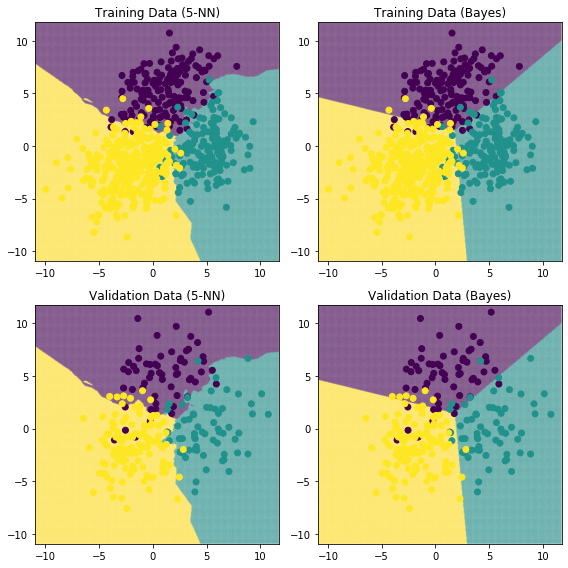

In [18]:
figure(figsize=(8, 8)) # If this is looking a bit squished, you can change the 8 (width) and 8 (height)
subplot(2,2,1)
pcolormesh(xx,yy,drK.reshape(xx.shape),alpha=0.1,antialiased=True)
axis('tight')
scatter(trainingdata[:,0],trainingdata[:,1],c=traininglabels)
title('Training Data (%i-NN)'%k)
subplot(2,2,2)
pcolormesh(xx,yy,drB.reshape(xx.shape),alpha=0.1,antialiased=True)
axis('tight')
scatter(trainingdata[:,0],trainingdata[:,1],c=traininglabels)
title('Training Data (Bayes)')
subplot(2,2,3)
pcolormesh(xx,yy,drK.reshape(xx.shape),alpha=0.1,antialiased=True)
axis('tight')
scatter(valdata[:,0],valdata[:,1],c=vallabels)
title('Validation Data (%i-NN)'%k)
subplot(2,2,4)
pcolormesh(xx,yy,drB.reshape(xx.shape),alpha=0.1,antialiased=True)
axis('tight')
scatter(valdata[:,0],valdata[:,1],c=vallabels)
title('Validation Data (Bayes)')
tight_layout()

**Some Short Answer Questions**

The training and validation data used in problems 1-3 was all drawn from the distribution described in problem 1.  Compare and contrast the results you got from LDA and k-Nearest Neighbors as well as the Bayes classifier from problem 1. Your answer should consider both computational resources as well as error performance. <b>(5 points)</b>

<b>LDA: <br>
Traning Error 6.50%<br>
     Validation Error 9.58%<br>
     Time for calculating priors 397 µs ± 62.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)<br>
     Time for training classifier 197 µs ± 4.09 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)<br>
<br>
Bayes Classifier: <br>
Error- 9.5833% 
<br><br>
k-Nearest Neighbors:<br>
The training error with k=5 is 6.0000% <br>
                     The validation error with k=5 is 10.0000 %<br>
Time for k=1  44.3 ms per loop <br>
Time for k=3  48.4 ms  per loop <br>
Time for k=5  48.1 ms  µs per loop <br>

<br>                     
It's clear from the above data that the lowest error on the validation set was seen in the LDA algorithm which is similar to the Bayes classifier. The 5-NN algorithm performs as good as LDA and Bayes (it has only 0.5% higher error) but to figure out which k to use we had to run the algorithm multiple times which involves a lot of computational resources. The k-NN algorithm gives a non-linear boundary whereas both LDA and Bayes classifiers gave linear decision boundaries. LDA and Bayes's classifier gives similar results however Bayes is slightly less expensive computationally since the prior probabilities and the covariance matrix is already given whereas in LDA it has to be extracted from the dataset which makes it take an additional of 397 µs. We see that the k-NN algorithm is the most computationally expensive of all the algorithms here even if it takes 4 lines to implement.



Compared to other values of k in k-NN, why the training error is zero when you use the standard nearest neighbor (1-NN) algorithm?  <b>(5 points)</b>

<b> The training error is zero in the 1-NN algorithm because each datapoint is in its "own neighbourhoud". Since the classifier had to classify each data which it was trained on and using only 1-NN the error was zero. However for the validation set using 1-NN the error was the highest among k=1,3,4,5

Assuming you did not have knowledge of the true distribution of the data, out of the classifiers discussed in problems 1-3 (Bayes, LDA, kNN with the k you selected above), which classifier would you prefer in this problem? Why? <b>(5 points)</b>

<b> Without knowing the true distribution of data Bayes classifier will be hard to use since the prior probabilities may not be known. Similarly LDA can be used only if we assume that the feature vectors are modeled as being distributed as a multivariate Gaussian distribution under each class. This leaves us with only the k-NN classifier to be used.

#### Problem 4: LDA and kNN using scikit-learn <b>(20 points)</b>

In many cases, you will be using other people's libraries to implement learning algorithms. In this problem, you will become familiar with scikit-learn's implementation of LDA and kNN.

First, we will load a data set of digits drawn from zip codes written on US mail. This data set was designed to help get good algorithms to sort mail by zip code automatically. It has been preprocessed a bit, with details given <a href="http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/zip.info.txt">here</a>. Each feature vector consists of $16^2$ real values representing grayscale values of a 16 by 16 image of a digit. The training data has 7291 samples, while the validation data has 2007 samples. Note that this is not the same dataset built into scikit-learn -- it is much larger. 

In [19]:
#Loading the Data

#Read in the Training Data
traindata_tmp= genfromtxt('zip.train', delimiter=' ') 

#The training labels are stored in "trainlabels", training features in "traindata". Rows are feature vectors.
trainlabels=traindata_tmp[:,0]
traindata=traindata_tmp[:,1:]

#Read in the Validation Data
valdata_tmp= genfromtxt('zip.val', delimiter=' ') 

#The validation labels are stored in "vallabels", validation features in "valdata". Rows are feature vectors.
vallabels=valdata_tmp[:,0]
valdata=valdata_tmp[:,1:]

Use scikit-learn's sklearn.neighbors.KNeighborsClassifier to run a Nearest Neighbor classifier (1-NN) on the validation data with the provided training set. Note that KNeighborsClassifier defaults to 5-NN. 

Measure the time for fitting the model and classification (the %timeit feature or time() or similar will be useful). Try the different algorithms possible to fit the model (ball tree, kd-tree and brute force, and specify the fastest one in your code). Make sure to calculate the error on the validation set.  <b>(5 points)</b>

In [23]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
algo=["ball_tree", "kd_tree","brute"]
for x in algo:
    neigh = KNeighborsClassifier(n_neighbors=1,algorithm=x)
    neigh.fit(traindata,trainlabels)
    estimated_lables=neigh.predict(valdata)
    error_valid=classifierError(vallabels,estimated_lables)
    print("-------------------------------------------------------------")
    print("Error using the algorithm", x," on validation set is %3.4f" %(error_valid))
    print("Time taken using the algorithm", x,"for fitting is:")
    %timeit KNeighborsClassifier(n_neighbors=1,algorithm=x)
    print("Time taken using the algorithm", x," for classification is:")
    %timeit neigh.predict(valdata)
    print("-------------------------------------------------------------")
    
    print()

-------------------------------------------------------------
Error using the algorithm ball_tree  on validation set is 5.6303
Time taken using the algorithm ball_tree for fitting is:
5.97 µs ± 364 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Time taken using the algorithm ball_tree  for classification is:
6.05 s ± 258 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
-------------------------------------------------------------

-------------------------------------------------------------
Error using the algorithm kd_tree  on validation set is 5.6303
Time taken using the algorithm kd_tree for fitting is:
6.15 µs ± 172 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Time taken using the algorithm kd_tree  for classification is:
8.71 s ± 1.38 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
-------------------------------------------------------------

-------------------------------------------------------------
Error using the algorithm brute  on va

<b>From the above results we see that the error was constant (=5.6303%) across the different alogorithms used for k-NN classifier. The brute algorithm was the fastest taking only about 6.23 µs for fitting and 586 ms for classfication.

Now, run LDA on the validation data set with scikit-learn's sklearn.discriminant_analysis.LinearDiscriminantAnalysis class. Measure the training time as well as the time used to classify the validation set. Make sure to calculate the error on the validation set.  <b>(5 points)</b>

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(traindata,trainlabels)
estimated_lables=clf.predict(valdata)
error_valid=classifierError(vallabels,estimated_lables)
print("The Error using the LDA is %3.4f" %(error_valid))
print("The time for training using LDA is")
%timeit clf.fit(traindata,trainlabels)
print("The time for classification using LDA is")
%timeit clf.predict(valdata)

The Error using the LDA is 11.4599
The time for training using LDA is
526 ms ± 20.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The time for classification using LDA is
3.08 ms ± 31.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<b>The Error using the LDA is 11.4599%
The time using the LDA is 526 ms for training and 3.08 ms for classification.

Based on the performance on the validation set, which algorithm would you pick? Your answer should also take into account computational resources required, error on the validation set, and the cost associated with making an error (in real life -- recall the source of the data). <b>(5 points)</b>

<b>  Based on the performance on the validation set (error and time), I will choose the k-NN classifier using the brute algorithm as it gives the lowest possible error (=5.6303%) using the least amount of time (=6.23 µs for training and 586 ms for classification) among all the algorithms. The only concern will be that the results for the k-NN classifier were obtained using k=1 and hence we might have to use multiple iterations with different k values to get optimal value of k. Also minimizing the validation error is important in this case as the cost associated with making an error is high since it could amount to making a loss for the postal services if the packages/zipcodes are identified incorrectly and sent to the wrong address.

Do you think the 0,1-loss is appropriate error measure in this case? Why or why not? How can you use domain-specific knowledge to help improve performance for this application?

If you are interested in this in more detail on this problem, see O. Matan et al., "Reading Handwritten Digits: A ZIP Code Recognition System", IEEE Computer, Vol 25, Number 7, pp 59-63, 1992 (<a href="http://yann.lecun.com/exdb/publis/pdf/matan-92.pdf">tech report version here</a>). You do not need to look at this to answer the question. <b>(5 points)</b>

<b> I don't think for this case 0,1-loss function is appropriate error measure as we are dealing with a classification problem where we classify 10 different digits and say if we have correctly recognized it or not. So the 0,1-loss function will predict 0 almost 9 time more than 1, since out of 10 digits only one is the correct answer. Also, the 0,1-loss function will not be able to tell us which digits are more often recognised correctly or incorrectly and hence we don't get a proper feedback on how to improve the algorithm. This will not help us improve our model.

## And this concludes Lab 2! 